In [1]:
# Kaggle House Prices Competition
## jupyter notebook exploring the data

In [2]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline  

In [3]:
# Load the data
train = pd.read_csv('housing_train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

# view data size
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
# view a sample of the dataset
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


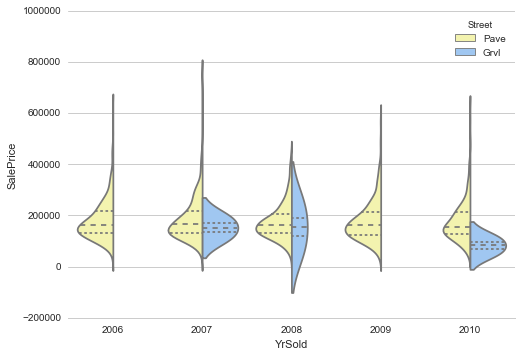

In [5]:
# make some plots of the data to explore and practice using seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="YrSold", y="SalePrice", hue="Street", data=train, split=True,
               inner="quart", palette={"Grvl": "b", "Pave": "y"})
sns.despine(left=True)

/Users/nicholerigby/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


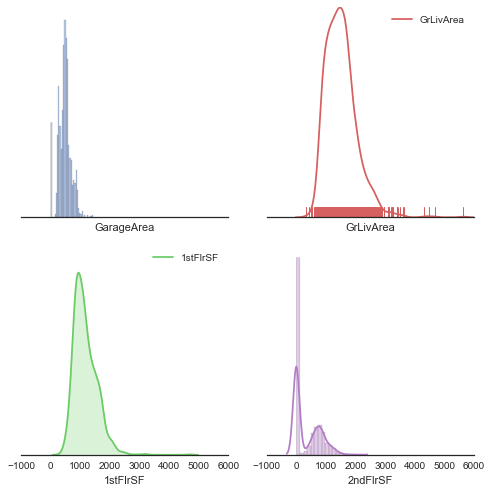

In [6]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(train['GarageArea'], kde=False, color="b", ax=axes[0, 0], label='GarageArea')

# Plot a kernel density estimate and rug plot
sns.distplot(train['GrLivArea'], hist=False, rug=True, color="r", ax=axes[0, 1], label='GrLivArea')

# Plot a filled kernel density estimate
sns.distplot(train['1stFlrSF'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0], label='1stFlrSF')

# Plot a historgram and kernel density estimate
sns.distplot(train['2ndFlrSF'], color="m", ax=axes[1, 1], label='2ndFlrSF')

plt.setp(axes, yticks=[])
plt.tight_layout()

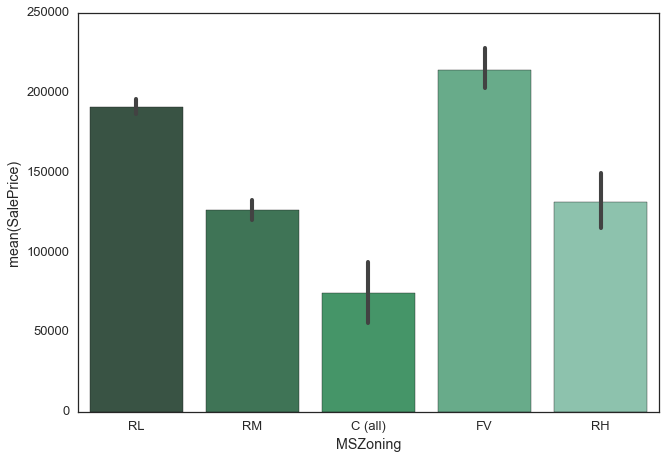

In [7]:
sns.set(style="white", context="talk")
sns.barplot(train['MSZoning'], train['SalePrice'], palette="BuGn_d")

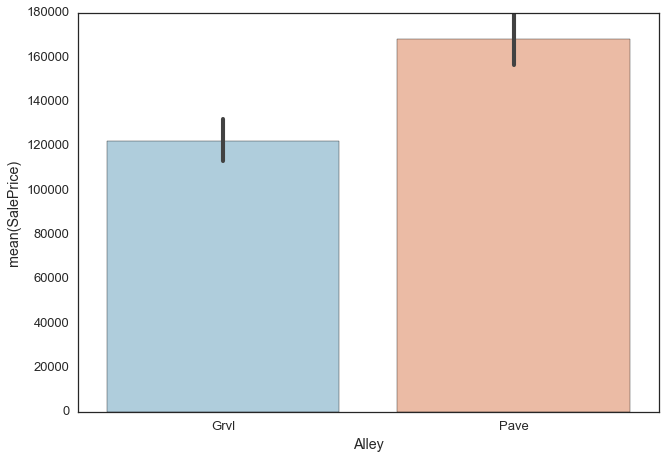

In [8]:
sns.set(style="white", context="talk")
sns.barplot(train['Alley'], train['SalePrice'], palette="RdBu_r")

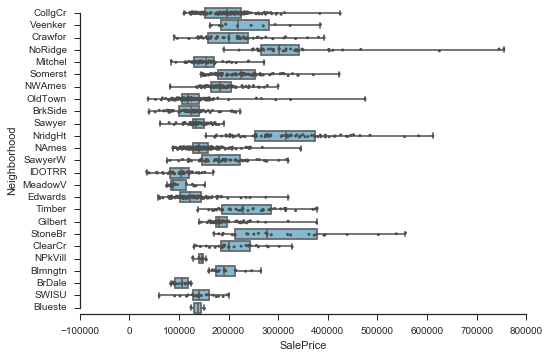

In [9]:
sns.set(style="ticks", palette="muted", color_codes=True)

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="SalePrice", y="Neighborhood", data=train, whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="SalePrice", y="Neighborhood", data=train, jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

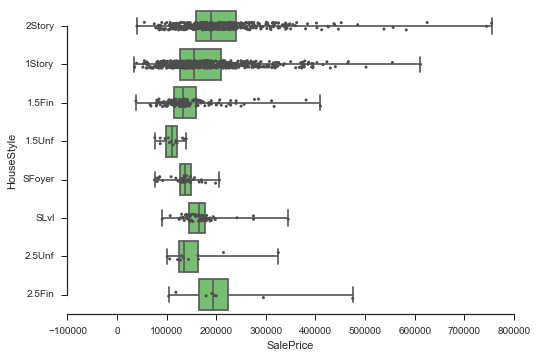

In [10]:
sns.set(style="ticks", palette="muted", color_codes=True)

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="SalePrice", y="HouseStyle", data=train, whis=np.inf, color="g")

# Add in points to show each observation
sns.stripplot(x="SalePrice", y="HouseStyle", data=train, jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

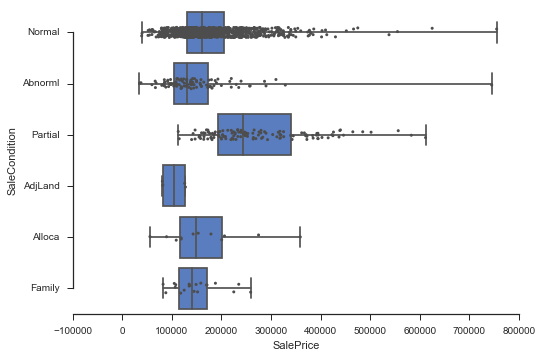

In [11]:
sns.set(style="ticks", palette="muted", color_codes=True)

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="SalePrice", y="SaleCondition", data=train, whis=np.inf, color="b")

# Add in points to show each observation
sns.stripplot(x="SalePrice", y="SaleCondition", data=train, jitter=True, size=3, color=".3", linewidth=0)

sns.despine(trim=True)

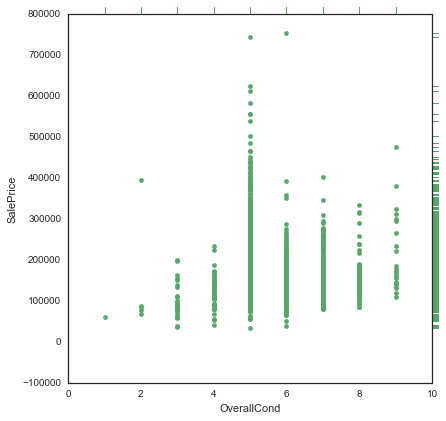

In [12]:
sns.set(style="white", color_codes=True)
grid = sns.JointGrid(train['OverallCond'], train['SalePrice'], space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

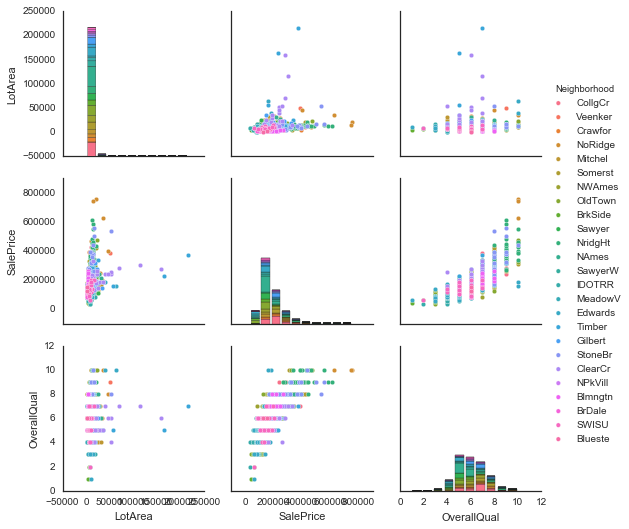

In [13]:
# look at some potentially important contributors to SalePrice (LotArea, OverallQual, Neightborhood) with pairplot
sns.pairplot(train, hue="Neighborhood", vars=['LotArea','SalePrice','OverallQual'])

In [14]:
# data is a mix of variable types, and we know that some integer variables are actually numerical codes for categorical data
# go through each variable as necessary

# Categorical Variables that we can turn into dummies

# MSSubClass: Identifies the type of dwelling involved in the sale.
# MSZoning: Identifies the general zoning classification of the sale.
# Street: Type of road access to property
# Alley: Type of alley access to property
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to various conditions
# Condition2: Proximity to various conditions (if more than one is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# Foundation: Type of foundation
# Heating: Type of heating
# CentralAir: Central air conditioning
# Electrical: Electrical system
# Functional: Home functionality (Assume typical unless deductions are warranted)
# GarageType: Garage location
# GarageFinish: Interior finish of the garage
# PavedDrive: Paved driveway
# MiscFeature: Miscellaneous feature not covered in other categories
# SaleType: Type of sale
# SaleCondition: Condition of sale
    
    
# Continuous and discrete variables that can remain unchanged (except for missing data)

# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# MasVnrArea: Masonry veneer area in square feet
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
# Kitchen: Kitchens above grade
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Fireplaces: Number of fireplaces
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# MiscVal: $Value of miscellaneous feature
# BsmtFinSF1: Type 1 finished square feet


# Ordinal Variables already properly coded numerically
# on scale from 1-10 indicating very poor to very excellent

# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house


# Ordinal Variables that need to be numerically coded

# ExterQual: Evaluates the quality of the material on the exterior
# ExterCond: Evaluates the present condition of the material on the exterior
# BsmtQual: Evaluates the height of the basement
# BsmtCond: Evaluates the general condition of the basement
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
# BsmtFinType2: Rating of basement finished area (if multiple types)
# HeatingQC: Heating quality and condition
# KitchenQual: Kitchen quality
# FireplaceQu: Fireplace quality
# GarageQual: Garage quality
# GarageCond: Garage condition
# PoolQC: Pool quality
# Fence: Fence quality


# Date related variables

# YearBuilt: Original construction date
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# GarageYrBlt: Year garage was built
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)

In [15]:
# Deal with ordinal variables that need coding

# view levels
for column in ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
               'GarageCond','PoolQC', 'Fence']:
    print("Levels for catgeory '{0}': {1}".format(column, train[column].unique()))

Levels for catgeory 'ExterQual': ['Gd' 'TA' 'Ex' 'Fa']
Levels for catgeory 'ExterCond': ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Levels for catgeory 'BsmtQual': ['Gd' 'TA' 'Ex' nan 'Fa']
Levels for catgeory 'BsmtCond': ['TA' 'Gd' nan 'Fa' 'Po']
Levels for catgeory 'BsmtExposure': ['No' 'Gd' 'Mn' 'Av' nan]
Levels for catgeory 'BsmtFinType1': ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Levels for catgeory 'BsmtFinType2': ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Levels for catgeory 'HeatingQC': ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Levels for catgeory 'KitchenQual': ['Gd' 'TA' 'Ex' 'Fa']
Levels for catgeory 'FireplaceQu': [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Levels for catgeory 'GarageQual': ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Levels for catgeory 'GarageCond': ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Levels for catgeory 'PoolQC': [nan 'Ex' 'Fa' 'Gd']
Levels for catgeory 'Fence': [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [16]:
# check for levels that may be different between training and testing sets
# get lists for levels in data frames
for column in ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
               'GarageCond','PoolQC', 'Fence']:
    traindummies = list(pd.get_dummies(train[column],dummy_na=True).columns)
    testdummies = list(pd.get_dummies(test[column],dummy_na=True).columns)
    # categories in training but not in test set
    difference1 = list(set(traindummies) - set(testdummies))
    # categories in test but not in training set
    difference2 = list(set(testdummies) - set(traindummies))
    if len(difference1) != 0:
        print("Levels in training but not in testing for category '{}' ({}): \b {} ".format(column, str(len(difference1)), difference1))
    if len(difference2) != 0:
        print("Levels in testing but not in training for category '{}' ({}): \b {} ".format(column, str(len(difference2)), difference2))

Levels in training but not in testing for category 'ExterQual' (1):  [nan] 
Levels in testing but not in training for category 'ExterQual' (1):  [nan] 
Levels in training but not in testing for category 'ExterCond' (1):  [nan] 
Levels in testing but not in training for category 'ExterCond' (1):  [nan] 
Levels in training but not in testing for category 'BsmtQual' (1):  [nan] 
Levels in testing but not in training for category 'BsmtQual' (1):  [nan] 
Levels in training but not in testing for category 'BsmtCond' (1):  [nan] 
Levels in testing but not in training for category 'BsmtCond' (1):  [nan] 
Levels in training but not in testing for category 'BsmtExposure' (1):  [nan] 
Levels in testing but not in training for category 'BsmtExposure' (1):  [nan] 
Levels in training but not in testing for category 'BsmtFinType1' (1):  [nan] 
Levels in testing but not in training for category 'BsmtFinType1' (1):  [nan] 
Levels in training but not in testing for category 'BsmtFinType2' (1

In [17]:
# encode ordinal levels in training data
train['ExterQual'] = train['ExterQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['ExterCond'] = train['ExterCond'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['BsmtQual'] = train['BsmtQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['BsmtCond'] = train['BsmtCond'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['BsmtExposure'] = train['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0}) 
train['BsmtFinType1'] = train['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})
train['BsmtFinType2'] = train['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})
train['HeatingQC'] = train['HeatingQC'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0}) 
train['KitchenQual'] = train['KitchenQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['FireplaceQu'] = train['FireplaceQu'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['GarageQual'] = train['GarageQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['GarageCond'] = train['GarageCond'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['PoolQC'] = train['PoolQC'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
train['Fence'] = train['Fence'].map({'NA':0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1})

# encode ordinal levels in test data
test['ExterQual'] = test['ExterQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['ExterCond'] = test['ExterCond'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['BsmtQual'] = test['BsmtQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['BsmtCond'] = test['BsmtCond'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['BsmtExposure'] = test['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0}) 
test['BsmtFinType1'] = test['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})
test['BsmtFinType2'] = test['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})
test['HeatingQC'] = test['HeatingQC'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0}) 
test['KitchenQual'] = test['KitchenQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['FireplaceQu'] = test['FireplaceQu'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['GarageQual'] = test['GarageQual'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['GarageCond'] = test['GarageCond'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['PoolQC'] = test['PoolQC'].map({'TA':3, 'Gd':4, 'Fa':2, 'Po':1, 'Ex':5, 'NA':0})
test['Fence'] = test['Fence'].map({'NA':0, 'MnPrv':3, 'GdWo':2, 'GdPrv':4, 'MnWw':1})

# replace missing values with zero, indicating none
for column in ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
               'GarageCond','PoolQC', 'Fence', 'OverallQual','OverallCond']:
    train[column] = train[column].fillna(0)
    test[column] = test[column].fillna(0)
    

In [18]:
# Check all ordinal variables in training set for missing data (include those already coded)
for column in ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
               'GarageCond','PoolQC', 'Fence', 'OverallQual','OverallCond']:
    print("Missing Values for category '{0}': {1}".format(column, np.isnan(train[column]).any()))

Missing Values for category 'ExterQual': False
Missing Values for category 'ExterCond': False
Missing Values for category 'BsmtQual': False
Missing Values for category 'BsmtCond': False
Missing Values for category 'BsmtExposure': False
Missing Values for category 'BsmtFinType1': False
Missing Values for category 'BsmtFinType2': False
Missing Values for category 'HeatingQC': False
Missing Values for category 'KitchenQual': False
Missing Values for category 'FireplaceQu': False
Missing Values for category 'GarageQual': False
Missing Values for category 'GarageCond': False
Missing Values for category 'PoolQC': False
Missing Values for category 'Fence': False
Missing Values for category 'OverallQual': False
Missing Values for category 'OverallCond': False


In [19]:
# Check all ordinal variables in test set for missing data (include those already coded)
for column in ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
               'GarageCond','PoolQC', 'Fence', 'OverallQual','OverallCond']:
    print("Missing Values for category '{0}': {1}".format(column, np.isnan(test[column]).any()))

Missing Values for category 'ExterQual': False
Missing Values for category 'ExterCond': False
Missing Values for category 'BsmtQual': False
Missing Values for category 'BsmtCond': False
Missing Values for category 'BsmtExposure': False
Missing Values for category 'BsmtFinType1': False
Missing Values for category 'BsmtFinType2': False
Missing Values for category 'HeatingQC': False
Missing Values for category 'KitchenQual': False
Missing Values for category 'FireplaceQu': False
Missing Values for category 'GarageQual': False
Missing Values for category 'GarageCond': False
Missing Values for category 'PoolQC': False
Missing Values for category 'Fence': False
Missing Values for category 'OverallQual': False
Missing Values for category 'OverallCond': False


In [20]:
# double check encoding
for column in ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
               'GarageCond','PoolQC', 'Fence','OverallQual','OverallCond']:
    print("Levels for catgeory '{0}': {1}".format(column, train[column].unique()))

Levels for catgeory 'ExterQual': [4 3 5 2]
Levels for catgeory 'ExterCond': [3 4 2 1 5]
Levels for catgeory 'BsmtQual': [ 4.  3.  5.  0.  2.]
Levels for catgeory 'BsmtCond': [ 3.  4.  0.  2.  1.]
Levels for catgeory 'BsmtExposure': [ 1.  4.  2.  3.  0.]
Levels for catgeory 'BsmtFinType1': [ 6.  5.  1.  3.  4.  0.  2.]
Levels for catgeory 'BsmtFinType2': [ 1.  4.  0.  5.  3.  2.  6.]
Levels for catgeory 'HeatingQC': [5 4 3 2 1]
Levels for catgeory 'KitchenQual': [4 3 5 2]
Levels for catgeory 'FireplaceQu': [ 0.  3.  4.  2.  5.  1.]
Levels for catgeory 'GarageQual': [ 3.  2.  4.  0.  5.  1.]
Levels for catgeory 'GarageCond': [ 3.  2.  0.  4.  1.  5.]
Levels for catgeory 'PoolQC': [ 0.  5.  2.  4.]
Levels for catgeory 'Fence': [ 0.  3.  2.  4.  1.]
Levels for catgeory 'OverallQual': [ 7  6  8  5  9  4 10  3  1  2]
Levels for catgeory 'OverallCond': [5 8 6 7 4 2 3 9 1]


In [21]:
# double check encoding
for column in ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
               'GarageCond','PoolQC', 'Fence','OverallQual','OverallCond']:
    print("Levels for catgeory '{0}': {1}".format(column, test[column].unique()))

Levels for catgeory 'ExterQual': [3 4 5 2]
Levels for catgeory 'ExterCond': [3 4 2 1 5]
Levels for catgeory 'BsmtQual': [ 3.  4.  5.  2.  0.]
Levels for catgeory 'BsmtCond': [ 3.  1.  2.  4.  0.]
Levels for catgeory 'BsmtExposure': [ 1.  4.  2.  3.  0.]
Levels for catgeory 'BsmtFinType1': [ 3.  5.  6.  1.  4.  2.  0.]
Levels for catgeory 'BsmtFinType2': [ 2.  1.  3.  4.  6.  5.  0.]
Levels for catgeory 'HeatingQC': [3 4 5 2 1]
Levels for catgeory 'KitchenQual': [ 3.  4.  5.  2.  0.]
Levels for catgeory 'FireplaceQu': [ 0.  3.  4.  1.  2.  5.]
Levels for catgeory 'GarageQual': [ 3.  0.  2.  4.  1.]
Levels for catgeory 'GarageCond': [ 3.  0.  2.  4.  1.  5.]
Levels for catgeory 'PoolQC': [ 0.  5.  4.]
Levels for catgeory 'Fence': [ 3.  0.  4.  2.  1.]
Levels for catgeory 'OverallQual': [ 5  6  8  7  4  9  2  3 10  1]
Levels for catgeory 'OverallCond': [6 5 7 8 2 9 3 4 1]


In [22]:
# Look for missing data in continuous features in training set
for column in ['LotFrontage','LotArea','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
               'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
               'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF1','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']:
    print("Missing Values for category '{0}': {1}".format(column, np.isnan(train[column]).any()))
    # Bedroom and Kitchen while in data_description file is not in training file, however, BedroomAbvGr and KitchenAbvGr is in the training file and not in the data_description file. BedroomAbvGr is used in replace of Bedroom. KitchenAbvGr used in replace of Kitchen

Missing Values for category 'LotFrontage': True
Missing Values for category 'LotArea': False
Missing Values for category 'MasVnrArea': True
Missing Values for category 'BsmtFinSF1': False
Missing Values for category 'BsmtFinSF2': False
Missing Values for category 'BsmtUnfSF': False
Missing Values for category 'TotalBsmtSF': False
Missing Values for category '1stFlrSF': False
Missing Values for category '2ndFlrSF': False
Missing Values for category 'LowQualFinSF': False
Missing Values for category 'GrLivArea': False
Missing Values for category 'BsmtFullBath': False
Missing Values for category 'BsmtHalfBath': False
Missing Values for category 'FullBath': False
Missing Values for category 'HalfBath': False
Missing Values for category 'BedroomAbvGr': False
Missing Values for category 'KitchenAbvGr': False
Missing Values for category 'TotRmsAbvGrd': False
Missing Values for category 'Fireplaces': False
Missing Values for category 'GarageCars': False
Missing Values for category 'GarageArea':

In [23]:
# Look for missing data in continuous features in test set
for column in ['LotFrontage','LotArea','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
               'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
               'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF1','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']:
    print("Missing Values for category '{0}': {1}".format(column, np.isnan(test[column]).any()))
    # Bedroom and Kitchen while in data_description file is not in training file, however, BedroomAbvGr and KitchenAbvGr is in the training file and not in the data_description file. BedroomAbvGr is used in replace of Bedroom. KitchenAbvGr used in replace of Kitchen

Missing Values for category 'LotFrontage': True
Missing Values for category 'LotArea': False
Missing Values for category 'MasVnrArea': True
Missing Values for category 'BsmtFinSF1': True
Missing Values for category 'BsmtFinSF2': True
Missing Values for category 'BsmtUnfSF': True
Missing Values for category 'TotalBsmtSF': True
Missing Values for category '1stFlrSF': False
Missing Values for category '2ndFlrSF': False
Missing Values for category 'LowQualFinSF': False
Missing Values for category 'GrLivArea': False
Missing Values for category 'BsmtFullBath': True
Missing Values for category 'BsmtHalfBath': True
Missing Values for category 'FullBath': False
Missing Values for category 'HalfBath': False
Missing Values for category 'BedroomAbvGr': False
Missing Values for category 'KitchenAbvGr': False
Missing Values for category 'TotRmsAbvGrd': False
Missing Values for category 'Fireplaces': False
Missing Values for category 'GarageCars': True
Missing Values for category 'GarageArea': True
M

In [24]:
# fill in these missing values for both sets
for column in ['LotFrontage','LotArea','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
               'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
               'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF1','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']:
    train[column] = train[column].fillna(0)
    test[column] = test[column].fillna(0)

In [25]:
# check for missing once again, training set
for column in ['LotFrontage','LotArea','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
               'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
               'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF1','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']:
    print("Missing Values for category '{0}': {1}".format(column, np.isnan(train[column]).any()))

Missing Values for category 'LotFrontage': False
Missing Values for category 'LotArea': False
Missing Values for category 'MasVnrArea': False
Missing Values for category 'BsmtFinSF1': False
Missing Values for category 'BsmtFinSF2': False
Missing Values for category 'BsmtUnfSF': False
Missing Values for category 'TotalBsmtSF': False
Missing Values for category '1stFlrSF': False
Missing Values for category '2ndFlrSF': False
Missing Values for category 'LowQualFinSF': False
Missing Values for category 'GrLivArea': False
Missing Values for category 'BsmtFullBath': False
Missing Values for category 'BsmtHalfBath': False
Missing Values for category 'FullBath': False
Missing Values for category 'HalfBath': False
Missing Values for category 'BedroomAbvGr': False
Missing Values for category 'KitchenAbvGr': False
Missing Values for category 'TotRmsAbvGrd': False
Missing Values for category 'Fireplaces': False
Missing Values for category 'GarageCars': False
Missing Values for category 'GarageArea

In [26]:
# check for missing once again, testing set
for column in ['LotFrontage','LotArea','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
               'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
               'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
               'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF1','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']:
    print("Missing Values for category '{0}': {1}".format(column, np.isnan(test[column]).any()))

Missing Values for category 'LotFrontage': False
Missing Values for category 'LotArea': False
Missing Values for category 'MasVnrArea': False
Missing Values for category 'BsmtFinSF1': False
Missing Values for category 'BsmtFinSF2': False
Missing Values for category 'BsmtUnfSF': False
Missing Values for category 'TotalBsmtSF': False
Missing Values for category '1stFlrSF': False
Missing Values for category '2ndFlrSF': False
Missing Values for category 'LowQualFinSF': False
Missing Values for category 'GrLivArea': False
Missing Values for category 'BsmtFullBath': False
Missing Values for category 'BsmtHalfBath': False
Missing Values for category 'FullBath': False
Missing Values for category 'HalfBath': False
Missing Values for category 'BedroomAbvGr': False
Missing Values for category 'KitchenAbvGr': False
Missing Values for category 'TotRmsAbvGrd': False
Missing Values for category 'Fireplaces': False
Missing Values for category 'GarageCars': False
Missing Values for category 'GarageArea

In [27]:
# Finally, encode categorcial variables as dummies

# MSSubClass: Identifies the type of dwelling involved in the sale.
# MSZoning: Identifies the general zoning classification of the sale.
# Street: Type of road access to property
# Alley: Type of alley access to property
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to various conditions
# Condition2: Proximity to various conditions (if more than one is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# Foundation: Type of foundation
# Heating: Type of heating
# CentralAir: Central air conditioning
# Electrical: Electrical system
# Functional: Home functionality (Assume typical unless deductions are warranted)
# GarageType: Garage location
# GarageFinish: Interior finish of the garage
# PavedDrive: Paved driveway
# MiscFeature: Miscellaneous feature not covered in other categories
# SaleType: Type of sale
# SaleCondition: Condition of sale

# check for discrepancies between test and training
for column in ['MSSubClass', 'MSZoning', 'Street','Alley','LotShape','LandContour','Utilities',
               'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
               'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
               'Foundation','Heating','CentralAir','Electrical','Functional',
               'GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']:
    traindummies = list(pd.get_dummies(train[column],dummy_na=True).columns)
    testdummies = list(pd.get_dummies(test[column],dummy_na=True).columns)
    # categories in training but not in test set
    difference1 = list(set(traindummies) - set(testdummies))
    # categories in test but not in training set
    difference2 = list(set(testdummies) - set(traindummies))
    if len(difference1) != 0:
        print("Levels in training but not in testing for category '{}' ({}): \b {} ".format(column, str(len(difference1)), difference1))
    if len(difference2) != 0:
        print("Levels in testing but not in training for category '{}' ({}): \b {} ".format(column, str(len(difference2)), difference2))

Levels in training but not in testing for category 'MSSubClass' (1):  [nan] 
Levels in testing but not in training for category 'MSSubClass' (2):  [nan, 150.0] 
Levels in training but not in testing for category 'MSZoning' (1):  [nan] 
Levels in testing but not in training for category 'MSZoning' (1):  [nan] 
Levels in training but not in testing for category 'Street' (1):  [nan] 
Levels in testing but not in training for category 'Street' (1):  [nan] 
Levels in training but not in testing for category 'Alley' (1):  [nan] 
Levels in testing but not in training for category 'Alley' (1):  [nan] 
Levels in training but not in testing for category 'LotShape' (1):  [nan] 
Levels in testing but not in training for category 'LotShape' (1):  [nan] 
Levels in training but not in testing for category 'LandContour' (1):  [nan] 
Levels in testing but not in training for category 'LandContour' (1):  [nan] 
Levels in training but not in testing for category 'Utilities' (2):  [nan, 'NoSe

In [28]:
# define function for making dummy columns
def dummycol(df, col):
    """This function takes a dataframe (df) and column name (col) and creates dummy variables for the categories in the column. It adds these dummies as columns to the data frame and removes the original column."""
    for i in range(len(list(pd.get_dummies(df[col],dummy_na=True).columns))):
        df[col + '_' + str(list(pd.get_dummies(df[col],dummy_na=True).columns)[i])] = pd.get_dummies(df[col],dummy_na=True).iloc[:,i]

In [29]:
# make dummy columns for training and test set
# must be in same order for tpot
for column in ['MSSubClass', 'MSZoning', 'Street','Alley','LotShape','LandContour','Utilities',
               'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
               'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
               'Foundation','Heating','CentralAir','Electrical','Functional',
               'GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']:
    # get lists of all levels in category
    traindummies = list(pd.get_dummies(train[column],dummy_na=True).columns)
    testdummies = list(pd.get_dummies(test[column]).columns)
    alldummies = list(set(traindummies + testdummies))
    # create temporary categorical column 
    train[column + '_cat'] = pd.Categorical(train[column], categories=alldummies)
    test[column + '_cat'] = pd.Categorical(test[column], categories=alldummies)
    # make dummy column
    dummycol(train,column + '_cat')
    dummycol(test,column + '_cat')
    # remove original column, and temp column
    train = train.drop(column,1)
    test = test.drop(column,1)
    train = train.drop(column + '_cat',1)
    test = test.drop(column + '_cat',1)

/Users/nicholerigby/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
/Users/nicholerigby/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
/Users/nicholerigby/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of pandas.
/Users/nicholerigby/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
/Users/nicholerigby/anaconda3/lib/python3.5/site-packages/pandas/core/categorical.py:387: FutureWarning: 
Setting NaNs in `categories` is deprecated and will be removed in a future version of 

In [30]:
train.head(5)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_cat_ConLD,SaleType_cat_COD,SaleType_cat_Oth,SaleCondition_cat_nan,SaleCondition_cat_Alloca,SaleCondition_cat_AdjLand,SaleCondition_cat_Partial,SaleCondition_cat_Family,SaleCondition_cat_Abnorml,SaleCondition_cat_Normal
0,1,65.0,8450,7,5,2003,2003,196.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,80.0,9600,6,8,1976,1976,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,68.0,11250,7,5,2001,2002,162.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,60.0,9550,7,5,1915,1970,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,84.0,14260,8,5,2000,2000,350.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
test.head(5)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_cat_ConLD,SaleType_cat_COD,SaleType_cat_Oth,SaleCondition_cat_nan,SaleCondition_cat_Alloca,SaleCondition_cat_AdjLand,SaleCondition_cat_Partial,SaleCondition_cat_Family,SaleCondition_cat_Abnorml,SaleCondition_cat_Normal
0,1461,80.0,11622,5,6,1961,1961,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1462,81.0,14267,6,6,1958,1958,108.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1463,74.0,13830,5,5,1997,1998,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1464,78.0,9978,6,6,1998,1998,20.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1465,43.0,5005,8,5,1992,1992,0.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
test.dtypes

Id                             int64
LotFrontage                  float64
LotArea                        int64
OverallQual                    int64
OverallCond                    int64
YearBuilt                      int64
YearRemodAdd                   int64
MasVnrArea                   float64
ExterQual                      int64
ExterCond                      int64
BsmtQual                     float64
BsmtCond                     float64
BsmtExposure                 float64
BsmtFinType1                 float64
BsmtFinSF1                   float64
BsmtFinType2                 float64
BsmtFinSF2                   float64
BsmtUnfSF                    float64
TotalBsmtSF                  float64
HeatingQC                      int64
1stFlrSF                       int64
2ndFlrSF                       int64
LowQualFinSF                   int64
GrLivArea                      int64
BsmtFullBath                 float64
BsmtHalfBath                 float64
FullBath                       int64
H

In [33]:
train.dtypes

Id                             int64
LotFrontage                  float64
LotArea                        int64
OverallQual                    int64
OverallCond                    int64
YearBuilt                      int64
YearRemodAdd                   int64
MasVnrArea                   float64
ExterQual                      int64
ExterCond                      int64
BsmtQual                     float64
BsmtCond                     float64
BsmtExposure                 float64
BsmtFinType1                 float64
BsmtFinSF1                     int64
BsmtFinType2                 float64
BsmtFinSF2                     int64
BsmtUnfSF                      int64
TotalBsmtSF                    int64
HeatingQC                      int64
1stFlrSF                       int64
2ndFlrSF                       int64
LowQualFinSF                   int64
GrLivArea                      int64
BsmtFullBath                   int64
BsmtHalfBath                   int64
FullBath                       int64
H

In [34]:
# view levels
for column in train.columns:
        print("Levels for catgeory '{0}': {1}".format(column, train[column].unique()))

Levels for catgeory 'Id': [   1    2    3 ..., 1458 1459 1460]
Levels for catgeory 'LotFrontage': [  65.   80.   68.   60.   84.   85.   75.    0.   51.   50.   70.   91.
   72.   66.  101.   57.   44.  110.   98.   47.  108.  112.   74.  115.
   61.   48.   33.   52.  100.   24.   89.   63.   76.   81.   95.   69.
   21.   32.   78.  121.  122.   40.  105.   73.   77.   64.   94.   34.
   90.   55.   88.   82.   71.  120.  107.   92.  134.   62.   86.  141.
   97.   54.   41.   79.  174.   99.   67.   83.   43.  103.   93.   30.
  129.  140.   35.   37.  118.   87.  116.  150.  111.   49.   96.   59.
   36.   56.  102.   58.   38.  109.  130.   53.  137.   45.  106.  104.
   42.   39.  144.  114.  128.  149.  313.  168.  182.  138.  160.  152.
  124.  153.   46.]
Levels for catgeory 'LotArea': [ 8450  9600 11250 ..., 17217 13175  9717]
Levels for catgeory 'OverallQual': [ 7  6  8  5  9  4 10  3  1  2]
Levels for catgeory 'OverallCond': [5 8 6 7 4 2 3 9 1]
Levels for catgeory 'YearBuil

In [35]:
# double check for any missing data
for column in train.columns:
    if np.isnan(train[column].any()) == True:
        print("Missing Values for category '{0}': {1}".format(column, np.isnan(train[column]).any()))

In [36]:
# double check for any missing data
for column in test.columns:
    if np.isnan(test[column].any()) == True:
        print("Missing Values for category '{0}': {1}".format(column, np.isnan(test[column]).any()))

In [37]:
train.rename(columns={'SalePrice': 'class'}, inplace=True)

In [38]:
# make copy of training set without class
train_new = train.drop(['class'], axis=1)

In [39]:
type(train_new)

pandas.core.frame.DataFrame

In [40]:
# convert to numpy array
train_new_array = train_new.values

In [41]:
# check type
type(train_new_array)

numpy.ndarray

In [42]:
train_new_array.shape

(1460, 284)

In [43]:
# get list of class variables
train_class = train['class'].values
train_class

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [44]:
train_new_array

array([[  1.00000000e+00,   6.50000000e+01,   8.45000000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  2.00000000e+00,   8.00000000e+01,   9.60000000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  3.00000000e+00,   6.80000000e+01,   1.12500000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       ..., 
       [  1.45800000e+03,   6.60000000e+01,   9.04200000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.45900000e+03,   6.80000000e+01,   9.71700000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.46000000e+03,   7.50000000e+01,   9.93700000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [45]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train_new_array, train_class, train_size=0.75, test_size=0.25)

In [46]:
x_train.shape, y_train.shape

((1095, 284), (1095,))

In [47]:
x_test.shape, y_test.shape

((365, 284), (365,))

In [48]:
# import TPOTRegressor
from tpot import TPOTRegressor

/Users/nicholerigby/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
# initiate instance of tpot
tpot = TPOTRegressor(generations=2,verbosity=2,population_size=10)

In [50]:
# call the tpot fit function
tpot.fit(x_train, y_train)

Optimization Progress:  33%|███▎      | 10/30 [00:00<05:24, 16.22s/pipeline]

Generation 1 - Current best internal CV score: 798000763.1375364


Optimization Progress:  60%|██████    | 18/30 [00:00<01:37,  8.15s/pipeline]

Generation 2 - Current best internal CV score: 798000763.1375364


ValueError: There was an error in the TPOT optimization process. This could be because the data was not formatted properly, or because data for a regression problem was provided to the TPOTClassifier object. Please make sure you passed the data to TPOT correctly.

In [ ]:
# call the score function on the test data
tpot.score(x_test,y_test)